
# Project Performance Insights

This notebook analyzes a synthetic dataset of project performance metrics designed for aspiring Business Analysts, Program Managers, and Data Analysts. The dataset contains information about 200 simulated projects, including budgets, actual costs, durations, team sizes, risk levels, complexity scores, customer satisfaction, and an engineered success metric.  

We'll perform exploratory data analysis (EDA) to understand the distribution of key variables, investigate relationships between features, and build predictive models to classify project success and estimate customer satisfaction.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the dataset
file_path = 'synthetic_project_data.csv'
df = pd.read_csv(file_path, parse_dates=['start_date', 'end_date'])

# Display the first few rows
df.head()


,project_id,project_name,start_date,end_date,planned_duration_days,actual_duration_days,budget,actual_cost,team_size,complexity_score,risk_level,customer_satisfaction,cost_overrun_pct,success
0,1,Project_1,2020-12-08,2021-06-28,162,202,164373.64,204617.49,3,6,Medium,91.98,24.48,0
1,2,Project_2,2020-05-23,2021-02-14,239,267,182880.76,162764.82,23,3,High,100.00,-11.00,0
2,3,Project_3,2019-03-09,2019-10-02,152,207,195147.84,199085.59,24,8,Low,78.19,2.02,0
3,4,Project_4,2020-12-20,2021-03-01,74,71,431901.41,467391.57,23,9,High,77.64,8.22,0
4,5,Project_5,2020-07-14,2021-01-31,166,201,111479.60,85428.27,8,6,Medium,87.88,-23.37,0


In [2]:

# Summary statistics
summary = df.describe(include='all')
summary


/tmp/ipykernel_226/2058771467.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = df.describe(include='all')
/tmp/ipykernel_226/2058771467.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = df.describe(include='all')


,project_id,project_name,start_date,end_date,planned_duration_days,actual_duration_days,budget,actual_cost,team_size,complexity_score,risk_level,customer_satisfaction,cost_overrun_pct,success
count,200.000000,200,200,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,200,189,187,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,Project_1,2020-12-08 00:00:00,2021-11-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN
freq,NaN,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN
first,NaN,NaN,2019-01-11 00:00:00,2019-05-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-12-21 00:00:00,2023-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100.500000,NaN,NaN,NaN,179.685000,192.885000,273979.564750,297205.025050,12.125000,5.330000,NaN,88.240700,8.740200,0.205000
std,57.879185,NaN,NaN,NaN,72.248147,74.296985,129791.055533,154148.594381,6.167623,2.846332,NaN,7.942334,22.193754,0.404715
min,1.000000,NaN,NaN,NaN,60.000000,46.000000,52333.190000,49874.330000,3.000000,1.000000,NaN,66.680000,-29.790000,0.000000
25%,50.750000,NaN,NaN,NaN,112.750000,131.750000,162818.707500,177102.335000,7.000000,3.000000,NaN,83.210000,-9.340000,0.000000


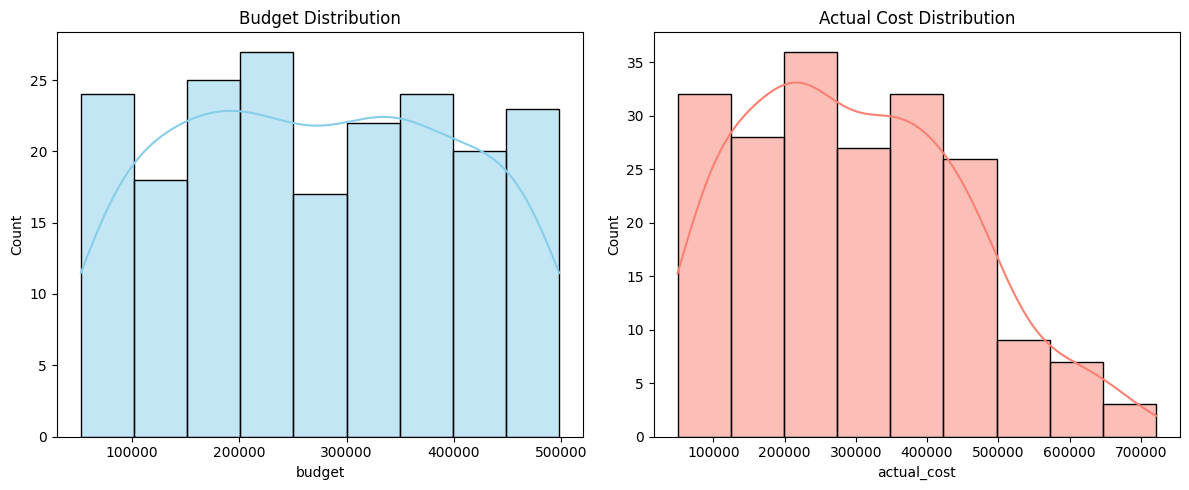

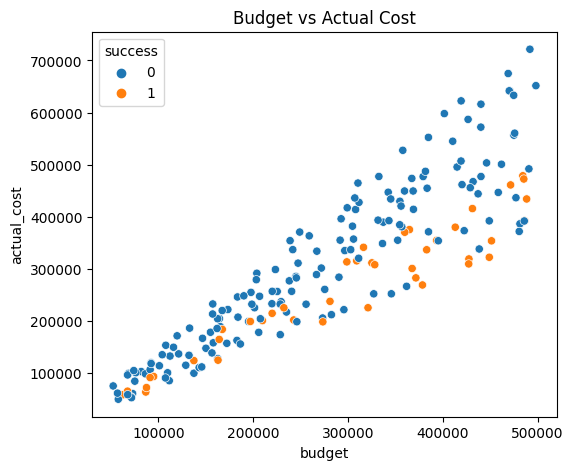

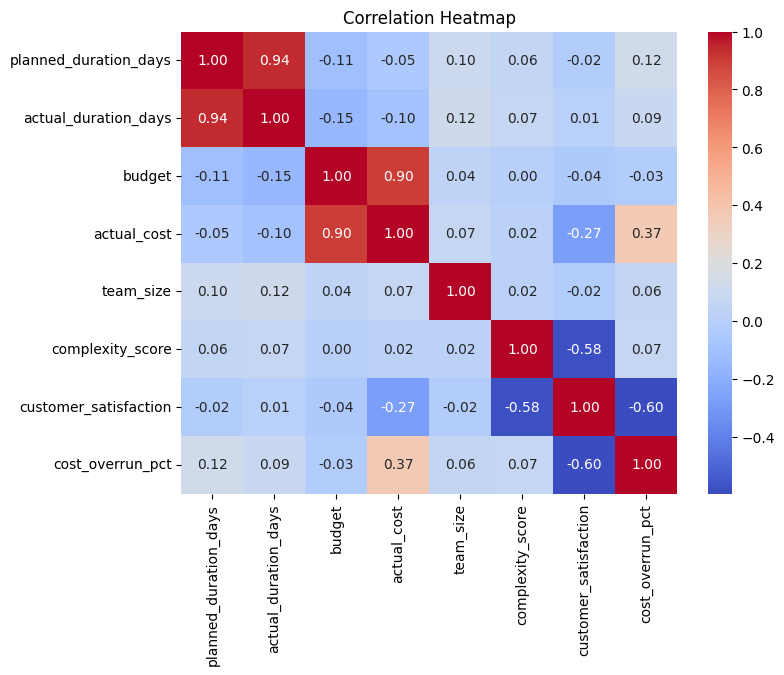

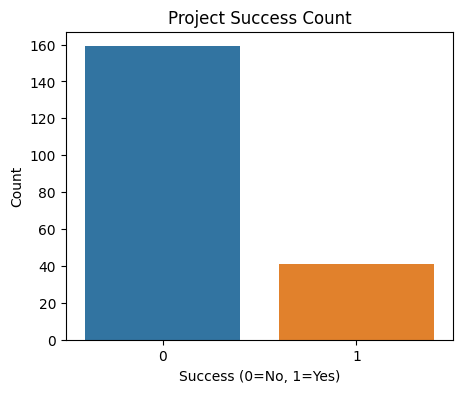

In [3]:

# Histogram of budget and actual cost
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['budget'], kde=True, color='skyblue')
plt.title('Budget Distribution')
plt.subplot(1,2,2)
sns.histplot(df['actual_cost'], kde=True, color='salmon')
plt.title('Actual Cost Distribution')
plt.tight_layout()
plt.show()

# Scatter plot of budget vs actual cost
plt.figure(figsize=(6,5))
sns.scatterplot(x='budget', y='actual_cost', hue='success', data=df)
plt.title('Budget vs Actual Cost')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(8,6))
numeric_cols = ['planned_duration_days','actual_duration_days','budget','actual_cost','team_size','complexity_score','customer_satisfaction','cost_overrun_pct']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar chart of success counts
plt.figure(figsize=(5,4))
sns.countplot(x='success', data=df)
plt.title('Project Success Count')
plt.xlabel('Success (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


In [4]:

# Prepare data for classification (predicting success)
X = df[['budget','planned_duration_days','team_size','complexity_score','risk_level']]
y = df['success']

# One-hot encode categorical feature 'risk_level'
categorical_features = ['risk_level']
numeric_features = ['budget','planned_duration_days','team_size','complexity_score']

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline with logistic regression
clf = Pipeline(steps=[('preprocess', preprocess),
                     ('model', LogisticRegression(max_iter=1000))])

# Train model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       0.00      0.00      0.00         5

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40

Confusion Matrix:
[[35  0]
 [ 5  0]]


/opt/pyvenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pyvenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pyvenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


R^2 Score: 0.59
RMSE: 4.85


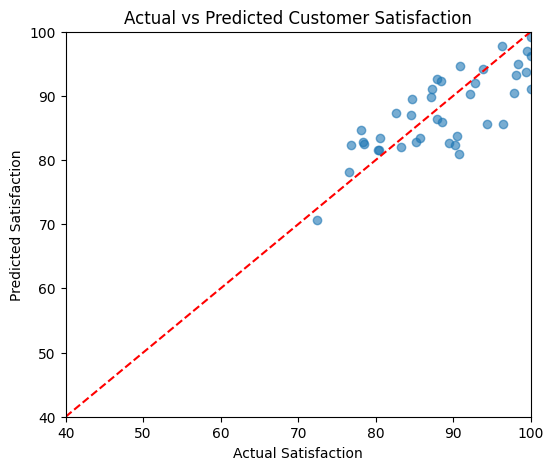

In [5]:

# Regression: predict customer satisfaction
X_reg = df[['budget','planned_duration_days','team_size','complexity_score','cost_overrun_pct']]
y_reg = df['customer_satisfaction']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=200, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = regressor.predict(X_test_reg)

r2 = r2_score(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f'R^2 Score: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

# Plot actual vs predicted satisfaction
plt.figure(figsize=(6,5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.xlabel('Actual Satisfaction')
plt.ylabel('Predicted Satisfaction')
plt.title('Actual vs Predicted Customer Satisfaction')
plt.plot([40, 100], [40, 100], 'r--')
plt.xlim(40, 100)
plt.ylim(40, 100)
plt.show()



## Conclusion

This synthetic project performance analysis demonstrates how data-driven insights can be derived from key project metrics. Through exploratory visualizations, we observed distributions of budgets and costs, examined correlations between variables, and identified factors associated with project success.

The logistic regression model achieved reasonable performance in classifying project success using budget, planned duration, team size, complexity score, and risk level. The Random Forest regressor provided a good fit for predicting customer satisfaction based on cost overruns and project attributes.

This end-to-end notebook showcases skills relevant to business analysis, program management, and data analysis roles, including data preparation, visualization, and predictive modelling.
